<a href="https://colab.research.google.com/github/7-sumit/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Sumit Berde
##### **Team Member 2 -** Omkar Desai

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('fivethirtyeight')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction - Sumit Berde/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'The number of rows are {data.shape[0]}')
print(f'The number of columns are {data.shape[1]}')

The number of rows are 3390
The number of columns are 17


### Rename Columns

In [6]:
data.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds','prevalentStroke':'prevalent_stroke',
                     'prevalentHyp':'prevalent_hyp','totChol':'total_cholesterol','sysBP':'systolic_bp',
                     'diaBP':'diastolic_bp','BMI':'bmi','heartRate':'heart_rate',
                     'TenYearCHD':'ten_year_chd'},inplace=True)

### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3390 non-null   int64  
 1   age                3390 non-null   int64  
 2   education          3303 non-null   float64
 3   sex                3390 non-null   object 
 4   is_smoking         3390 non-null   object 
 5   cigs_per_day       3368 non-null   float64
 6   bp_meds            3346 non-null   float64
 7   prevalent_stroke   3390 non-null   int64  
 8   prevalent_hyp      3390 non-null   int64  
 9   diabetes           3390 non-null   int64  
 10  total_cholesterol  3352 non-null   float64
 11  systolic_bp        3390 non-null   float64
 12  diastolic_bp       3390 non-null   float64
 13  bmi                3376 non-null   float64
 14  heart_rate         3389 non-null   float64
 15  glucose            3086 non-null   float64
 16  ten_year_chd       3390 

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {sum(data.duplicated())}')

The number of duplicate rows are 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print('Missing value count')
print(data.isnull().sum())
print(100*'-')
print('Missing percentage in each column')
print((data.isnull().sum()/data.shape[0])*100)


Missing value count
id                     0
age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing percentage in each column
id                   0.000000
age                  0.000000
education            2.566372
sex                  0.000000
is_smoking           0.000000
cigs_per_day         0.648968
bp_meds              1.297935
prevalent_stroke     0.000000
prevalent_hyp        0.000000
diabetes             0.000000
total_cholesterol    1.120944
systolic_bp          0.000000
diastolic_bp         0.000000
bmi              

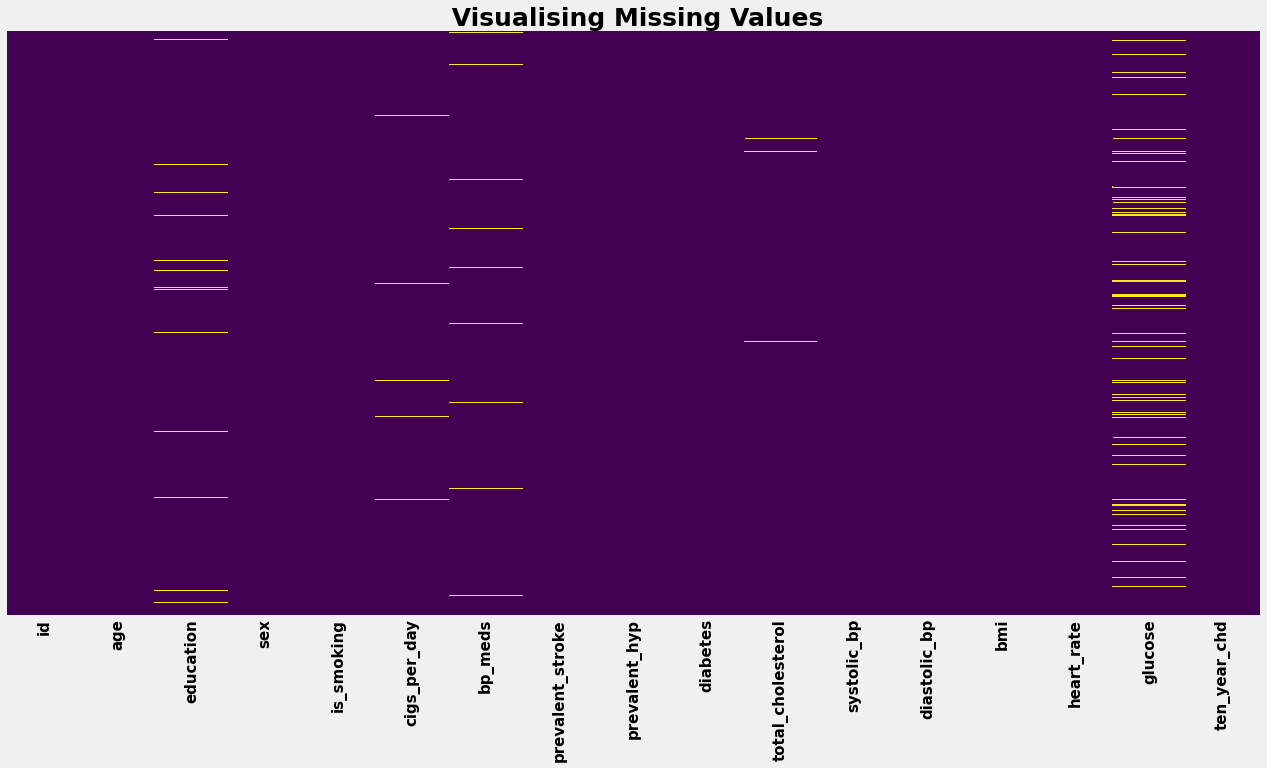

In [10]:
# Visualizing the missing values
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False,cbar=False)
plt.title(" Visualising Missing Values");

#### Dataset has missing values in 6 features.We will deal with it in further steps

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Creating a copy of dataset
df1 = data.copy()

In [12]:
# Dataset Columns
df1.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes',
       'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd'],
      dtype='object')

In [13]:
# Dataset Describe
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigs_per_day,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
bp_meds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalent_stroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalent_hyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
total_cholesterol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
systolic_bp,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [14]:
# Dataset describe
df1.describe(include='O')

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


### Variables Description 


* ***Sex***: male or female("M" or "F")
* ***Age***: Age of the patient
* ***is_smoking***: whether or not the patient is a current smoker ("YES" or "NO")
* ***Cigs Per Day***: the number of cigarettes that the person smoked on average in one day
* ***BP Meds***: whether or not the patient was on blood pressure medication
* ***Prevalent Stroke***: whether or not the patient had previously had a stroke
* ***Prevalent Hyp***: whether or not the patient was hypertensive
* ***Diabetes***: whether or not the patient had diabetes
* ***Tot Chol***: total cholesterol level
* ***Sys BP***: systolic blood pressure
* ***Dia BP***: diastolic blood pressure
* ***BMI***: Body Mass Index
* ***Heart Rate***: heart rate
* ***Glucose***: glucose level

Predict variable (desired target)
* ***ten_year_chd*** :10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”

Categorical Features
1. Nominal: 'sex' , 'is_smoking' , 'bp_meds' , 'prevalent_stroke' , 'prevalent_hyp' , 'diabetes'
2. Ordinal : 'education'

Numerical Features
1. Discrete: 'age' , 'cigs_per_day'
2. Continous: 'total_cholesterol' , 'systolic_bp' , 'diastolic_bp' , 'bmi' ,'heart_rate' , 'glucose' 

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in df1.columns:
  print(f'Unique values in {i} are {df1[i].unique()}')
  print(100*'-')

Unique values in id are [   0    1    2 ... 3387 3388 3389]
----------------------------------------------------------------------------------------------------
Unique values in age are [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
----------------------------------------------------------------------------------------------------
Unique values in education are [ 2.  4.  1.  3. nan]
----------------------------------------------------------------------------------------------------
Unique values in sex are ['F' 'M']
----------------------------------------------------------------------------------------------------
Unique values in is_smoking are ['YES' 'NO']
----------------------------------------------------------------------------------------------------
Unique values in cigs_per_day are [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 1

## 3. ***Data Wrangling***

In [16]:
# Droping column 'Id' as it does not give any information
df1.drop(columns=['id'],axis=1,inplace=True) 

# Mapping values in categorical features with appropriate name for analysis
df1['sex'] = df1['sex'].map({'M':'Male','F':'Female'})
df1['is_smoking'] = df1['is_smoking'].map({'YES':'Yes','NO':'No'})

for col in ['bp_meds','prevalent_stroke','prevalent_hyp','diabetes']:
  df1[col] = df1[col].map({1:'Yes',0:'No'}) 

### What all manipulations have you done and insights you found?

1. Dropped 'Id' feature as it does not give any information
2. Mapping values in 'sex' , 'is_smoking', 'bp_meds' , 'prevalent_stroke' , 'prevalent_hyp' , 'diabetes' with appropriate name for analysis 
3. We have kept nan values in dataset.After analaysing the dataset, we will deal with missing values  

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [17]:
# Creating list of numerical features
num_col = list(df1.describe().loc[:,['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp',
       'bmi', 'heart_rate', 'glucose']].columns)

# Creating list of categorical features
cat_col = list(df1.describe(include='O').columns)       

### Univariate Analysis

#### Frequency distribution in categorical features

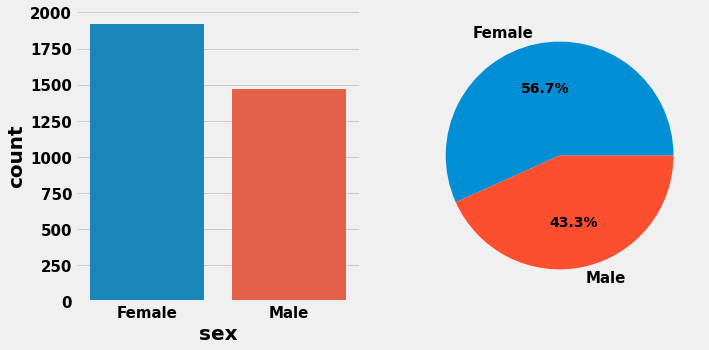

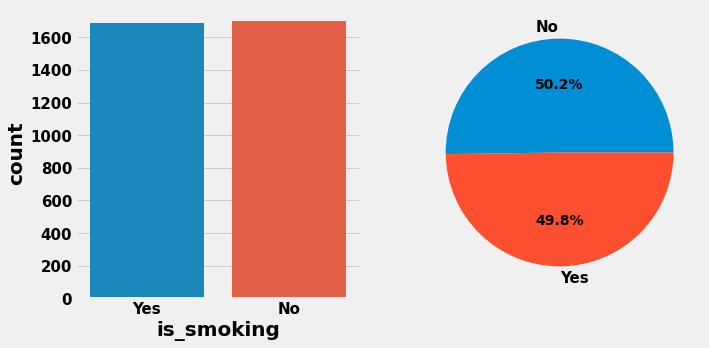

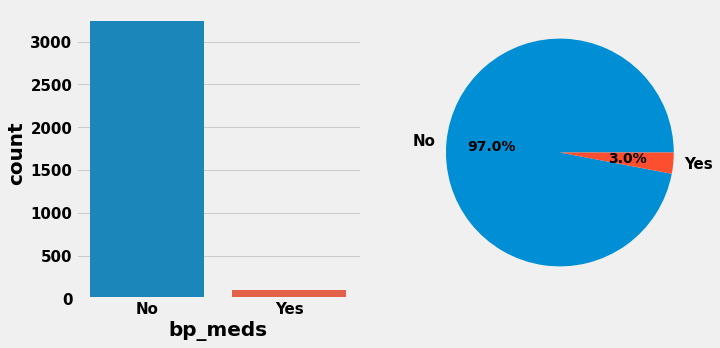

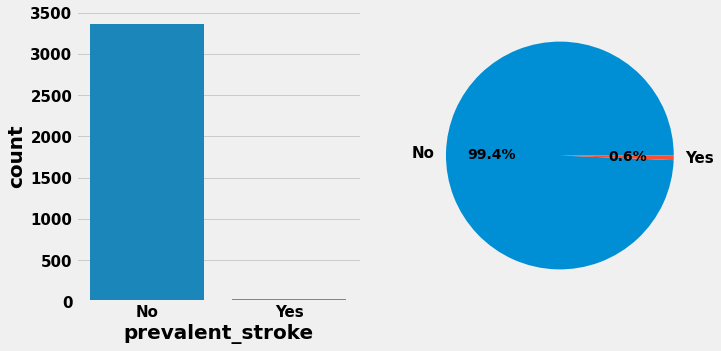

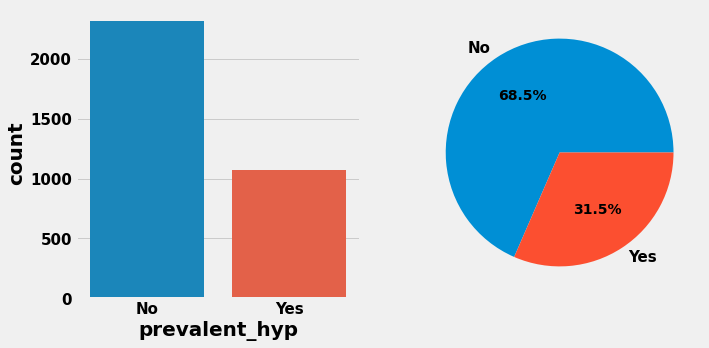

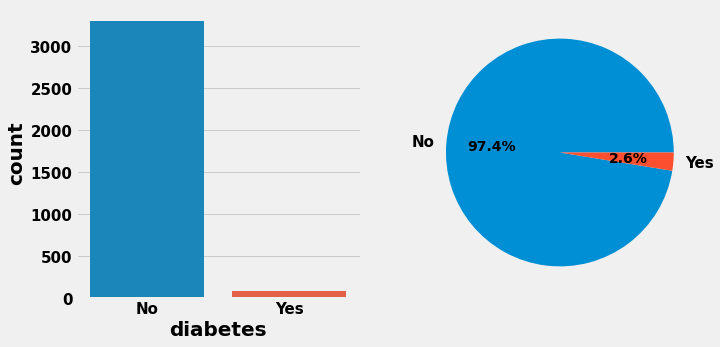

In [18]:
# Plotting for frequency distribution in categorical features
for col in cat_col:
  fig,ax = plt.subplots(1,2,figsize=(10,5))
  sns.countplot(data=df1,x=col,ax=ax[0])
  ax[1].pie(df1[col].value_counts(),autopct='%1.1f%%',labels=df1[col].value_counts().index)

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis to plot the frequency distribution of categories

##### 2. What is/are the insight(s) found from the chart?

1. Dataset consisted of more female population.Female represents 56.7% of data and male represents 43.3% of data
2. There is almost equal proportion of smokers(49.8%) and non-smokers(50.2%) in the data
3. Most of the people in the dataset were not on blood pressure medication almost 97%
4. Most of the people in the dataset did not have any previous history of strokes almost 99.4%
5. Significant number of people in the dataset had previous history of hypertension almost 31.5%
6. Most of people in the dataset did not have diabetes
almost 97.4%   

#### Checking distribution of data in numerical features

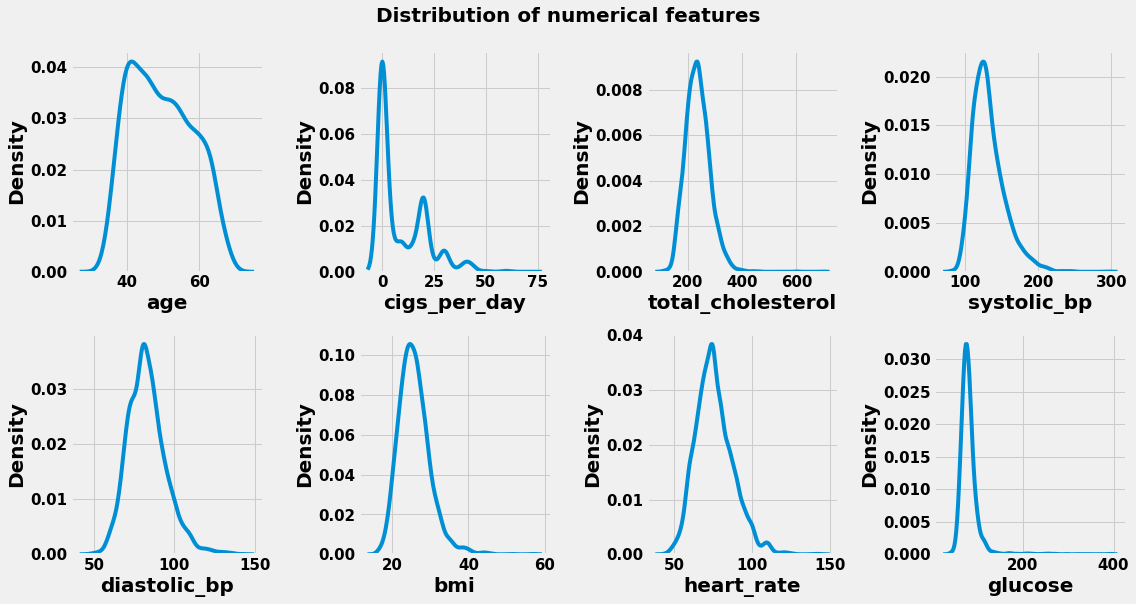

In [19]:
# Plotting to check distribution in numerical features
plt.figure(figsize=(16,8))
plt.suptitle('Distribution of numerical features',fontweight='bold',fontsize=20,y=1.05)
for i,col in enumerate(num_col): 
  plt.subplot(2,4,i+1)
  sns.kdeplot(data=df1,x=col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

##### 2. What is/are the insight(s) found from the chart?

1. Age is not normally distributed
2. Cigs_per_day appears to have bimodal(2 modes) distribution
3. total_cholesterol , systolic_bp , diastolic_bp , Bmi , heart_rate , glucose is right skewed. Log transformation ideally should be used for right skewed data  

#### Checking for outliers in numerical features

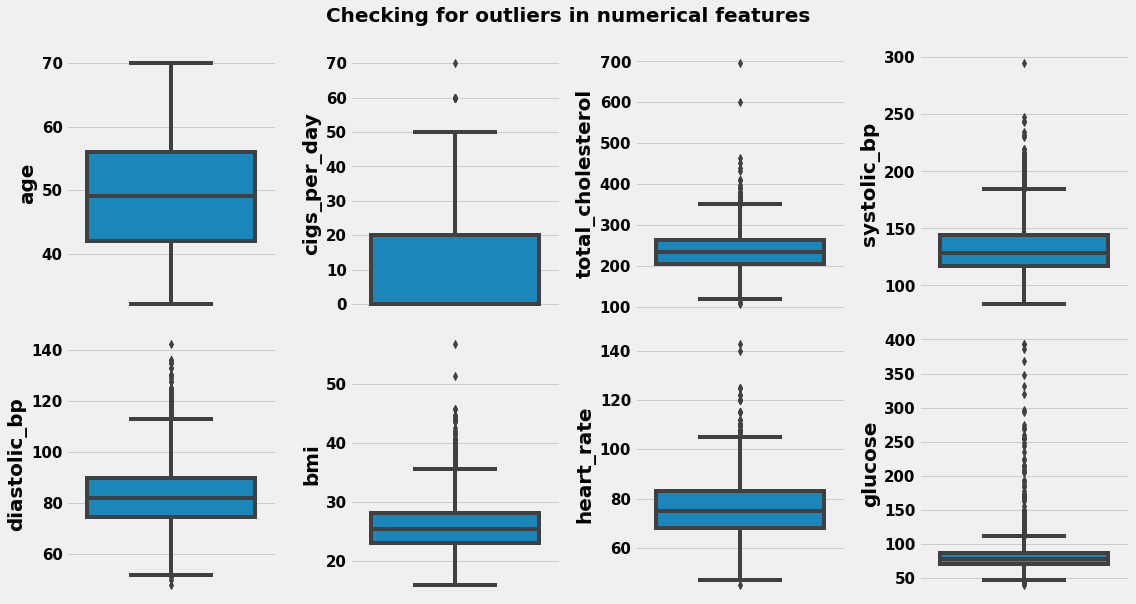

In [20]:
# Plotting boxplot to check for outliers
plt.figure(figsize=(16,8))
plt.suptitle('Checking for outliers in numerical features',fontweight='bold',fontsize=20,y=1.05)
for i,col in enumerate(num_col):
  plt.subplot(2,4,i+1)
  sns.boxplot(data=df1,y=col)
  plt.tight_layout() 

##### 1. Why did you pick the specific chart?

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

##### 2. What is/are the insight(s) found from the chart?

1. Age does not have any outliers
2. cigs_per_day , total_cholesterol , systolic_bp , diastolic_bp , bmi , heart_rate , glucose has outliers.We have deal with it later

### Bivariate and Multivariate Analysis

#### Finding the rate of people having cardiovasacular disease within categorical features

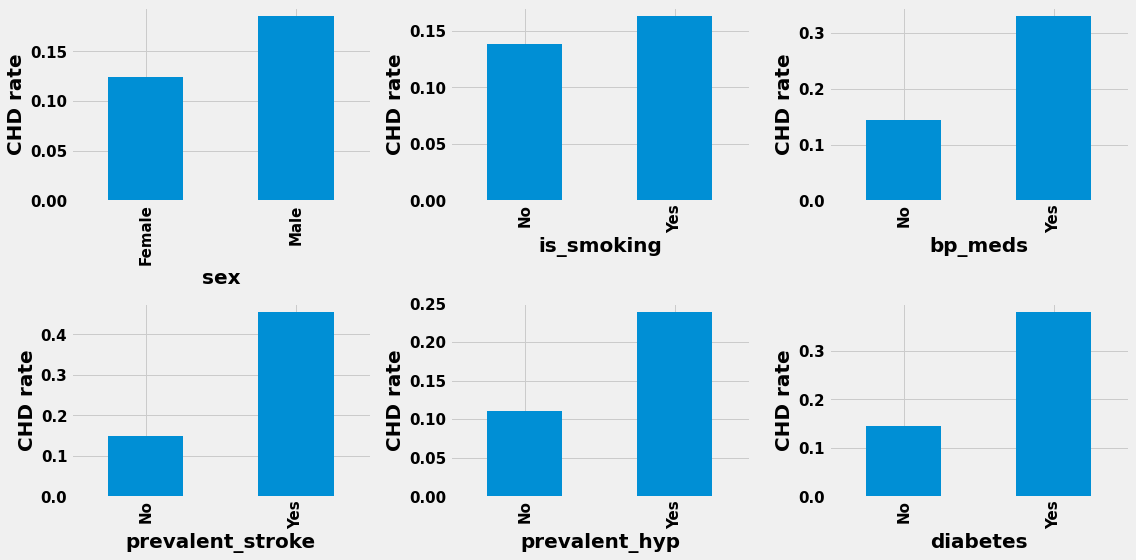

In [21]:
# Performing groupby operation to find rate of people having coronary heart disease(CHD) per category
plt.figure(figsize=(16,8))
for i,col in enumerate(cat_col):
  plt.subplot(2,3,i+1)
  df1.groupby(col)['ten_year_chd'].mean().plot(kind='bar')   # Groupby category and finding mean of ten_year_chd
  plt.ylabel('CHD rate')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis to plot the frequency distribution of categories

##### 2. What is/are the insight(s) found from the chart?

1. Males seems to have higher rate of contracting heart disease than females
2. Smoking increases the chances of getting heart disease as more individuals who smoke seems to suffer from heart diasease 
3. It looks like if someone has pre-medical conditions such as blood pressure medication,prevalent stroke,prevalent hypertension and diabetes his chances of getting heart disease increases

#### Now lets do a detailed study about how various factors like smoking and pre-medical conditions like blood pressure medication,prevalent stroke,hypertension,diabetes effects your chances of contracting heart disease 

#### Plotting to find percentage of male and female smokers and finding the average cigrates smoked by males and females

Count of Males and Females who are smokers
----------------------------------------------------------------------------------------------------


,sex,counts
0,Male,911
1,Female,776


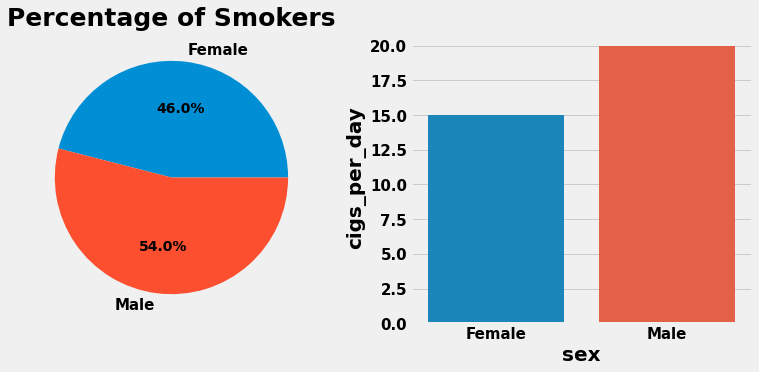

In [22]:
# Creating a df containing only smokers for analysis
smokers_df = df1.loc[df1['is_smoking']=='Yes',['sex','is_smoking','cigs_per_day','ten_year_chd']]

# Aggregating by gender and finding count of male and female smokers,also finding avg cigs per day by males and females
count_median_df = smokers_df.groupby('sex').agg({'ten_year_chd':'count','cigs_per_day':'median'}).reset_index()

# Plotting pie chart for showing percentage of male-female smokers, also barchart for avg cigarates smoked per day by males and females
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].pie(count_median_df['ten_year_chd'],autopct='%1.1f%%',labels=['Female','Male'])
ax[0].set_title('Percentage of Smokers')
sns.barplot(data=count_median_df,x='sex',y='cigs_per_day',ax=ax[1])
fig.show()

print('Count of Males and Females who are smokers')
print(100*'-')
smokers_df['sex'].value_counts().reset_index().rename(columns={'index':'sex','sex':'counts'})

In [23]:
# Finding out percentage of smokers and non-smokers in males and females who developed heart disease
print('Percentage of smokers and non-smokers in males/females, who developed heart disease')
print(90*'-')
pd.crosstab(index=[df1['sex'],df1['is_smoking']],columns=df1['ten_year_chd'],normalize='index').round(4)*100

Percentage of smokers and non-smokers in males/females, who developed heart disease
------------------------------------------------------------------------------------------


ten_year_chd           0      1
sex    is_smoking              
Female No          87.18  12.82
       Yes         88.14  11.86
Male   No          83.99  16.01
       Yes         79.91  20.09

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of all the smokers, 54% are males and 46% are females
2. In males, smoking seems to have increased the chances of getting heart disease.Out of all male smokers,        20.09% of them eventually suffered from heart disease. As compared to male non-smokers only 16.01% of them suffered from heart disease.There is 4% increase in chances in males of getting heart disease due to smoking
3. In females there seems to be no effect of smoking. But we think it may be due to insufficient data
4. Males on an average smoke more than females       

#### Plotting to find percentage of males and females that were on blood pressure medication.Then finding how blood pressure medication effects your chances of having heart disease

Count of Males and Females who were on blood pressure medication
----------------------------------------------------------------------------------------------------


,sex,counts
0,Female,69
1,Male,31


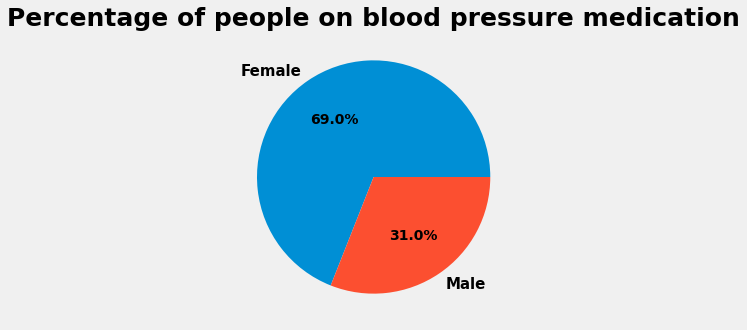

In [24]:
# Creating df of people who were previously on blood pressure medication 
blood_pressure_medication = df1.loc[df1['bp_meds']=='Yes',['sex']]

# Counting number of males and females on blood pressure medication
bp_med_count_df = blood_pressure_medication.value_counts().reset_index().rename(columns={0:'counts'})

# Plotting percentage of males and females who were on blood pressure medication
plt.figure(figsize=(7,5))
plt.pie(bp_med_count_df['counts'],autopct='%1.1f%%',labels=['Female','Male'])
plt.title('Percentage of people on blood pressure medication');

print('Count of Males and Females who were on blood pressure medication')
print(100*'-')
bp_med_count_df

In [25]:
# Finding percentage of males and females who were on blood pressure medication who eventually developed heart disease
print('Percentage of males and females who were on blood pressure medication who eventually developed heart disease')
print(110*'-')
pd.crosstab(index=[df1['sex'],df1['bp_meds']],columns=df1['ten_year_chd'],normalize='index').round(4)*100

Percentage of males and females who were on blood pressure medication who eventually developed heart disease
--------------------------------------------------------------------------------------------------------------


ten_year_chd        0      1
sex    bp_meds              
Female No       88.36  11.64
       Yes      68.12  31.88
Male   No       81.82  18.18
       Yes      64.52  35.48

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of all those people those who were on blood pressure medication 69% were females and 31% were males
2. In both males and females, the effect of blood pressure medication can be seen.In males out of all people who were on blood pressure medication 35.48% eventually contracted heart disease, whereas in females 31.88% contracted heart disease
3. In males those who were not on blood pressure medication only 18.18% people contracted heart disease and in females 11.64% contracted heart disease.Being on blood pressure medication increases your chances of getting heart disease 

#### Plotting to find percentage of males and females who had prevalent stroke.Then finding out how having prevalent stroke effects your chances of having heart disease

Count of Males and Females who previously had stroke
----------------------------------------------------------------------------------------------------


,sex,counts
0,Female,14
1,Male,8


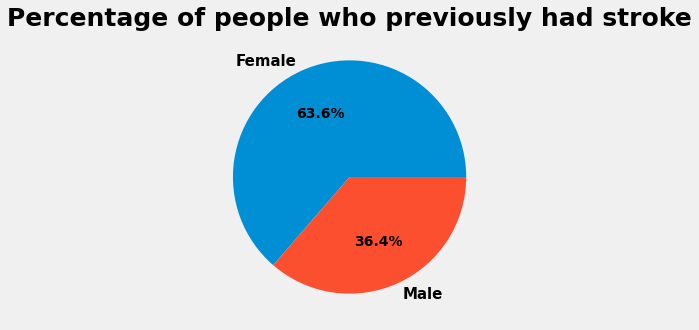

In [26]:
# Creating df of people who previously had stroke 
prevalent_stroke = df1.loc[df1['prevalent_stroke']=='Yes',['sex']]

# Counting number of males and females who previously had stroke
prevalent_stroke_count_df = prevalent_stroke.value_counts().reset_index().rename(columns={0:'counts'})

# Plotting percentage of males and females who previously had stroke
plt.figure(figsize=(7,5))
plt.pie(prevalent_stroke_count_df['counts'],autopct='%1.1f%%',labels=['Female','Male'])
plt.title('Percentage of people who previously had stroke');

print('Count of Males and Females who previously had stroke')
print(100*'-')
prevalent_stroke_count_df

In [27]:
# Finding percentage of males and females who were on blood pressure medication who eventually developed heart disease
print('Percentage of males and females who previously had stroke, who eventually developed heart disease')
print(110*'-')
pd.crosstab(index=[df1['sex'],df1['prevalent_stroke']],columns=df1['ten_year_chd'],normalize='index').round(4)*100

Percentage of males and females who previously had stroke, who eventually developed heart disease
--------------------------------------------------------------------------------------------------------------


ten_year_chd                 0      1
sex    prevalent_stroke              
Female No                87.79  12.21
       Yes               57.14  42.86
Male   No                81.63  18.37
       Yes               50.00  50.00

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of those people those who had prevalent stroke    63.6% were females and 36.4% were males
2. 50% of males who had stroke eventually developed heart disease and 42.86% of females who had stroke developed heart disease
3. Having prevalent stroke,significantly increases your chances of having heart disease  


#### Plotting to find percentage of males and females who had prevalent hypertension.Then finding out how having prevalent hypertension effects your chances of having heart disease

Count of Males and Females having hypertension
----------------------------------------------------------------------------------------------------


,sex,counts
0,Female,604
1,Male,465


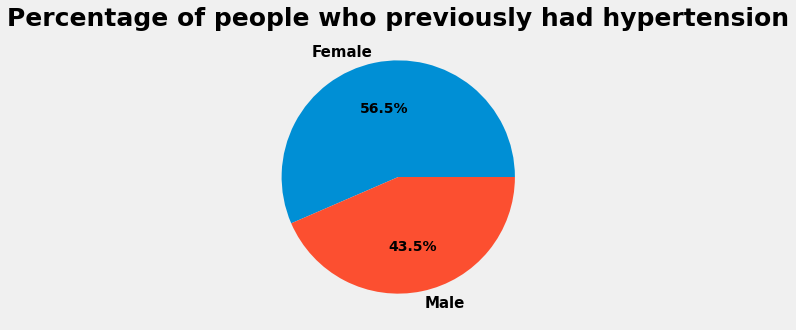

In [28]:
# Creating df of people who previously had hypertension 
prevalent_hypertension = df1.loc[df1['prevalent_hyp']=='Yes',['sex']]

# Counting number of males and females who previously had hypertension
prevalent_hypertension_count_df = prevalent_hypertension.value_counts().reset_index().rename(columns={0:'counts'})

# Plotting percentage of males and females who previously had hypertension
plt.figure(figsize=(7,5))
plt.pie(prevalent_hypertension_count_df['counts'],autopct='%1.1f%%',labels=['Female','Male'])
plt.title('Percentage of people who previously had hypertension');

print('Count of Males and Females having hypertension')
print(100*'-')
prevalent_hypertension_count_df

In [29]:
# Finding percentage of males and females who had hypertension who eventually developed heart disease
print('Percentage of males and females who previously had hypertension, who eventually developed heart disease')
print(110*'-')
pd.crosstab(index=[df1['sex'],df1['prevalent_hyp']],columns=df1['ten_year_chd'],normalize='index').round(4)*100

Percentage of males and females who previously had hypertension, who eventually developed heart disease
--------------------------------------------------------------------------------------------------------------


ten_year_chd              0      1
sex    prevalent_hyp              
Female No             91.74   8.26
       Yes            78.48  21.52
Male   No             85.33  14.67
       Yes            73.12  26.88

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of all those people who had hypertension, 56.5% were females and 43.5% were males
2. 26.88% of males who previously had hypertension developed heart disease and 21.52% of females who had hypertension developed heart disease
3. So having hypertension increases your chances of having heart disease

#### Plotting to find percentage of males and females who had diabetes.Then finding out how having diabetes effects your chances of having heart disease

Count of Males and Females having diabetes
----------------------------------------------------------------------------------------------------


,sex,counts
0,Female,47
1,Male,40


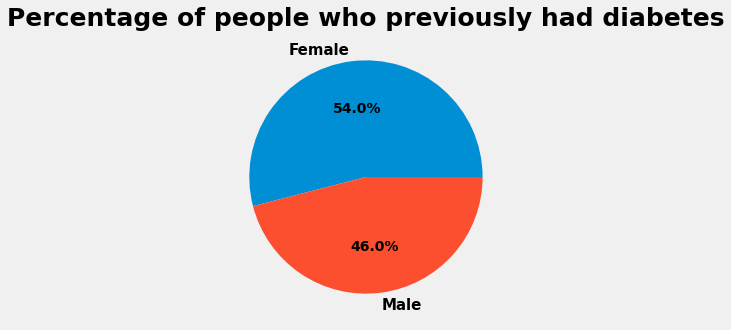

In [30]:
# Creating df of people who previously had diabetes
prevalent_diabetes = df1.loc[df1['diabetes']=='Yes',['sex']]

# Counting number of males and females who previously had diabetes
prevalent_diabetes_count_df = prevalent_diabetes.value_counts().reset_index().rename(columns={0:'counts'})

# Plotting percentage of males and females who previously had diabetes
plt.figure(figsize=(7,5))
plt.pie(prevalent_diabetes_count_df['counts'],autopct='%1.1f%%',labels=['Female','Male'])
plt.title('Percentage of people who previously had diabetes');

print('Count of Males and Females having diabetes')
print(100*'-')
prevalent_diabetes_count_df

In [31]:
# Finding percentage of males and females who had diabetes, who eventually developed heart disease
print('Percentage of males and females who previously had diabetes, who eventually developed heart disease')
print(110*'-')
pd.crosstab(index=[df1['sex'],df1['diabetes']],columns=df1['ten_year_chd'],normalize='index').round(4)*100

Percentage of males and females who previously had diabetes, who eventually developed heart disease
--------------------------------------------------------------------------------------------------------------


ten_year_chd         0      1
sex    diabetes              
Female No        88.06  11.94
       Yes       68.09  31.91
Male   No        82.20  17.80
       Yes       55.00  45.00

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of all those people who had diabetes, 54% were females and 46% were males
2. 45% of males who had diabetes developed heart disease
and 31.91% of females who had diabetes developed heart disease
3. So having diabetes plays a role in person developing heart disease

#### So to conclude is_smoking , bp_meds , prevalent_stroke , prevalent_hypertension , diabetes increases the chances of contracting heart disease. Those people who have suffered from stroke are most vulnerable towards developing heart disease 

#### Now we will look at all the numeric features for analysis

#### Plotting barplot to find the average value of numerical features when people contract heart disease and when people do not contract heart disease

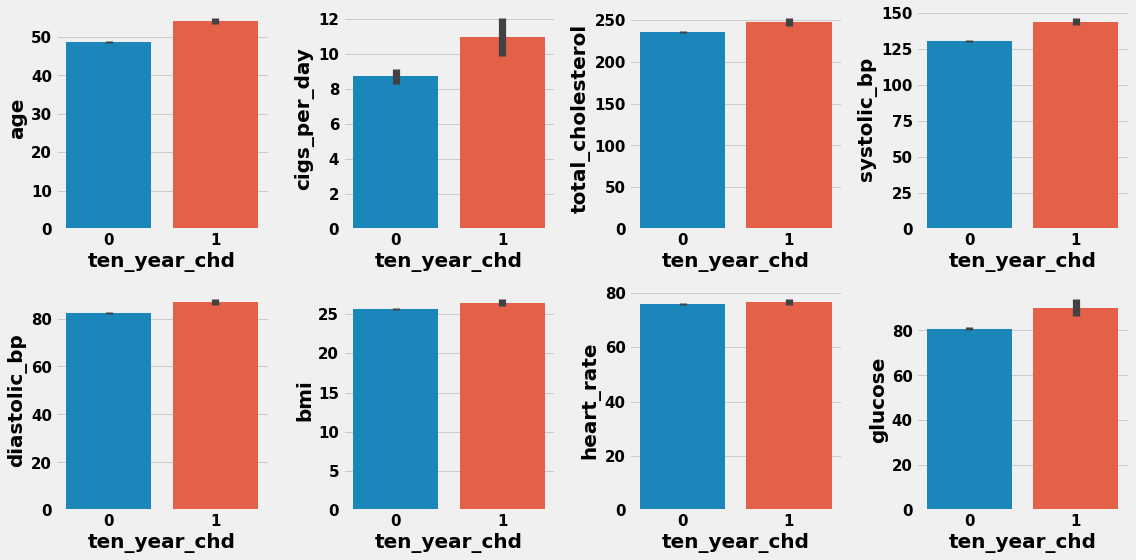

In [32]:
# Groupby ten_year_chd and then finding the mean of every numerical features
plt.figure(figsize=(16,8))
for i,col in enumerate(num_col):
 plt.subplot(2,4,i+1)
 sns.barplot(data=df1,x='ten_year_chd',y=col)
 plt.tight_layout()

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis to plot the frequency distribution of categories

##### 2. What is/are the insight(s) found from the chart?

1. Age , cigs_per_day , total_cholesterol , systolic_bp , diastolic_bp , glucose generally have high values for people developing heart disease as compared to people who not develop heart disease.
2. Heart rate and bmi are seems to be same for people developing heart disease and for people not developing heart disease

#### Pair Plot 

<Figure size 1440x1080 with 0 Axes>

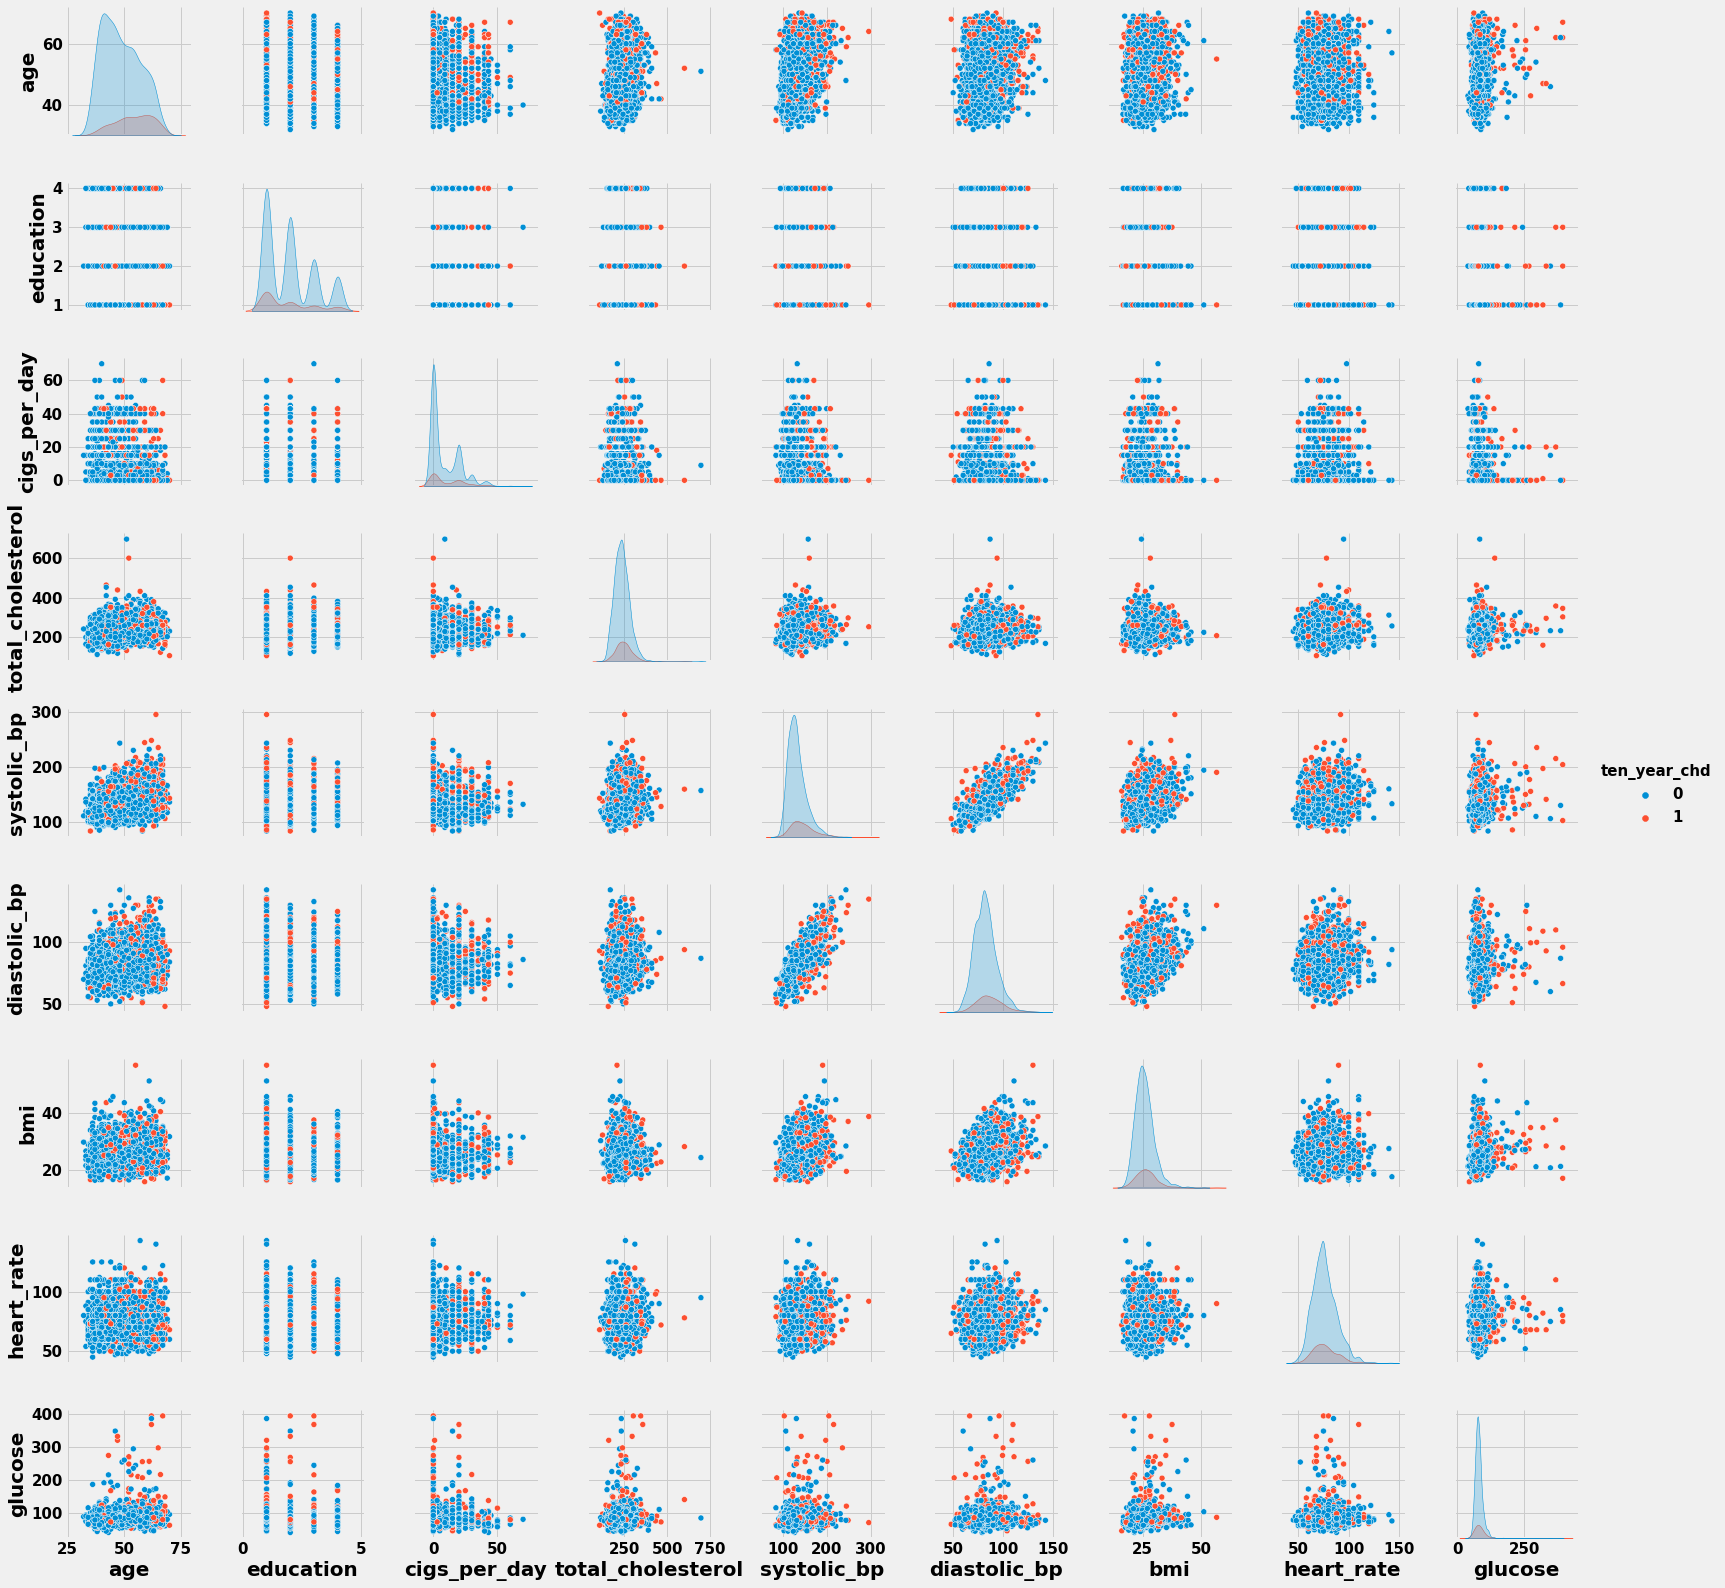

In [33]:
# Plotting pairplot to understand the relationship between numerical features and to see that if target classes are seperable are not
plt.figure(figsize=(20,15))
sns.pairplot(data=df1,hue='ten_year_chd');

##### 1. Why did you pick the specific chart?

Pairplot helps to understand which numerical features are important and helps to distinguish between two target classes

##### 2. What is/are the insight(s) found from the chart?

1. All the scatter plots that have been plotted does not give any information.Target classes are not seperable in the scatter plot
2. Scatter plot of 'glucose' with other features shows some seperatablity.Target classes are somewhat seperable

#### Correlation Heatmap

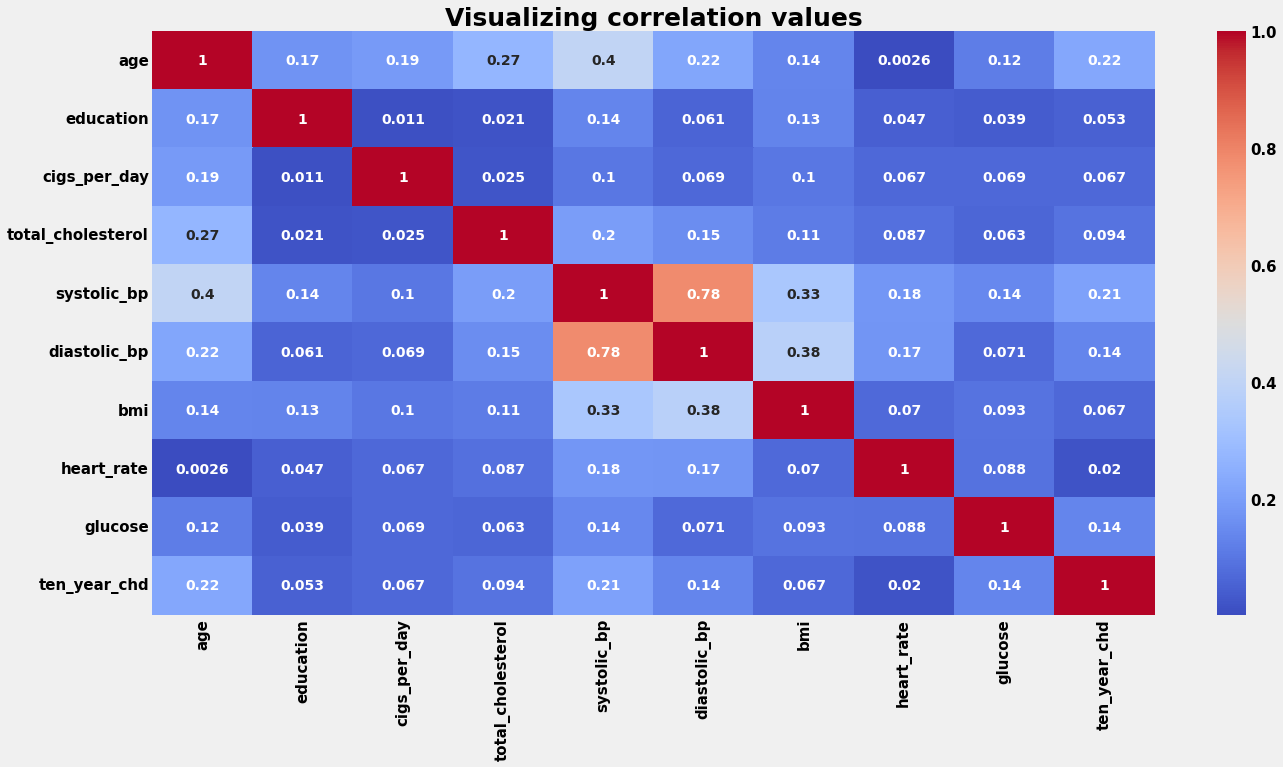

In [34]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(abs(df1.corr()),cmap='coolwarm',annot=True)
plt.title("Visualizing correlation values");

##### 1. Why did you pick the specific chart?

Heatmap helps to visualize the Pearsons correlation coeffient properly

##### 2. What is/are the insight(s) found from the chart?

1. Systolic blood pressure and diastolic blood pressure are highly correlated.Pulse pressure is defined as difference between systolic bp and diastolic bp. We are creating a new feature pulse pressure and then droping both systolic and diastolic bp
2. Multi-collinearity does not exist between other features apart from systolic and diastolic bp
3. Education has very little correlation with target variable.Dropping education feature 

#### Creating new feature called as pulse pressure which is difference between systolic and diastolic bp

In [35]:
# Creating new feature called as pulse pressure which is difference between systolic and diastolic bp
df1['pulse_pressure'] = df1['systolic_bp'] - df1['diastolic_bp']

# Dropping systolic_bp and diastolic_bp
df1.drop(columns=['systolic_bp','diastolic_bp'],axis=1,inplace=True)

# Dropping education feature
df1.drop(columns=['education'],axis=1,inplace=True) 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Does people with heart disease have mean pulse pressure significantlly higher than those people who do not have heart disease
2. Is there a statistically significant relationship between prevalent_hypertension and ten_year_chd
3. Does people with heart disease have mean cholesterol significantly higher than those people who do not have heart disease

In [36]:
# Creating a copy of dataset for hypothesis testing
df2 = df1.copy()

# As dataset had missing values temporarly dropping them for performing hypothesis testing
df2.dropna(axis=0,inplace=True)

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Is there a statistically significant relationship between prevalent_hypertension and ten_year_chd

*  Null Hypothesis (H0) : There is no relationship
*   Alternate Hypothesis (H1) : There is relationship
*   Test Type : Chi-square Test

#### 2. Perform an appropriate statistical test.

In [37]:
import scipy.stats as stats
from scipy.stats import chi2
df_table2 = pd.crosstab(df2['prevalent_hyp'],df2['ten_year_chd'])
print(df_table2)

ten_year_chd      0    1
prevalent_hyp           
No             1828  230
Yes             719  227


In [38]:
#observed values
Observed_values2 = df_table2.values
print('observed Values: ',Observed_values2)

observed Values:  [[1828  230]
 [ 719  227]]


In [39]:
val2 = stats.chi2_contingency(df_table2)
print(val2)

(81.586027567277, 1.6779625488647792e-19, 1, array([[1744.91544607,  313.08455393],
       [ 802.08455393,  143.91544607]]))


In [40]:
Expected_values2=val2[3]
no_of_rows2 = len(df_table2.iloc[0:2,0])
no_of_columns2 = len(df_table2.iloc[0,0:2])
ddof2 = (no_of_rows2 -1)*(no_of_columns2 -1)
print('degree of Freedom :-',ddof2)
alpha = 0.05

degree of Freedom :- 1


In [41]:
#getting Chi_square value
chi_square2 = sum([(o - e)**2./e for o,e in zip(Observed_values2,Expected_values2)])
chi_square_statistic2 = chi_square2[0] + chi_square2[1]
print('chi square statistic :',chi_square_statistic2)
critical_value2 = chi2.ppf(q = 1 - alpha,df = ddof2)
print('critical value:',critical_value2)

chi square statistic : 82.57692720813553
critical value: 3.841458820694124


In [42]:
#p-value
p_value2 = 1- chi2.cdf(x=chi_square_statistic2,df=ddof2)
print('p-value:',p_value2)
if p_value2 <= alpha:
  print('Reject H0,There is a relationship between prevalent_hypertension and ten_year_chd')
else:
  print("Accept H0,There is no relationship between prevalent hypertension and ten_year_chd'")

p-value: 0.0
Reject H0,There is a relationship between prevalent_hypertension and ten_year_chd


##### Which statistical test have you done to obtain P-Value?

We have used chi2 test

##### Why did you choose the specific statistical test?

chi2 test is used to find out whether there is association between two columns.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***